### Name : Ayodya W.K.H
### Index No : 190065K

### Question 1

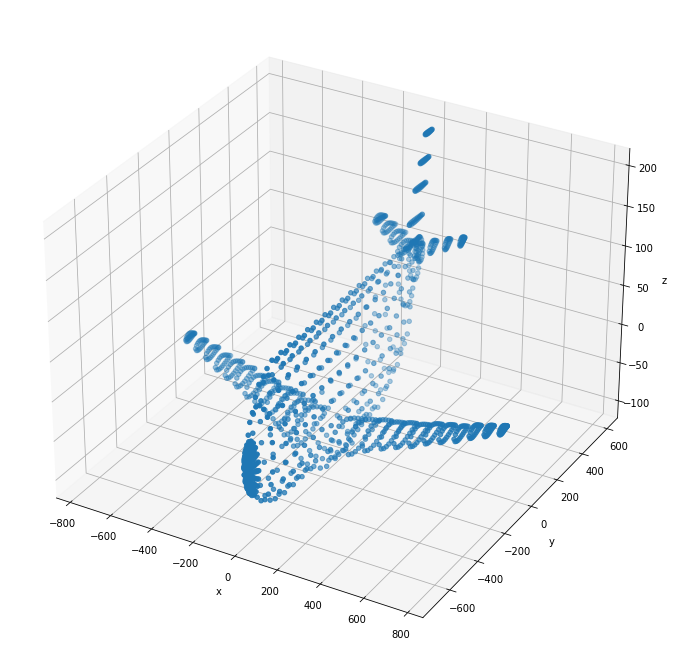

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from plyfile import PlyData, PlyElement

pcd = PlyData.read('airplane.ply')
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1, -1), pcd['vertex']['y'].reshape(1, -1), pcd['vertex']['z'].reshape(1, -1)), axis = 0)
points = points - np.mean(points, axis = 1).reshape(3,1)

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(points[0,:], points[1,:], points[2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

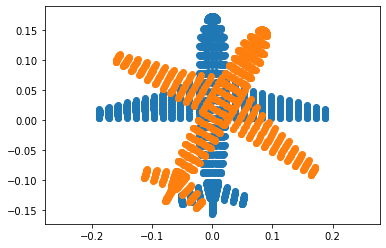

In [37]:
ones = np.ones((1, points.shape[1]))
X = np.concatenate((points, ones), axis = 0)

R = np.array([[1,0,0],[0,1,0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])
t = np.array([[0], [0], [-4000]])

P1 = K @ np.concatenate((R, t), axis = 1)

R = np.array([[0.866,0.5,0],[-0.5,0.866,0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])
t = np.array([[0], [0], [-4000]])

P2 = K @ np.concatenate((R, t), axis = 1)

X1 = P1 @ X
X1 = X1/X1[2,:]
X2 = P2 @ X
X2 = X2/X2[2,:]

fig , ax = plt.subplots(1, 1, sharex = True, sharey = True)
ax.scatter(X1[0,:], X1[1,:])
ax.scatter(X2[0,:], X2[1,:])
ax.axis('equal')
plt.show()

### Question 3

Items 1 , area in pixels = 59192
Items 1 , area in mm² = 2320.563168
Items 2 , area in pixels = 59249
Items 2 , area in mm² = 2322.7977960000003


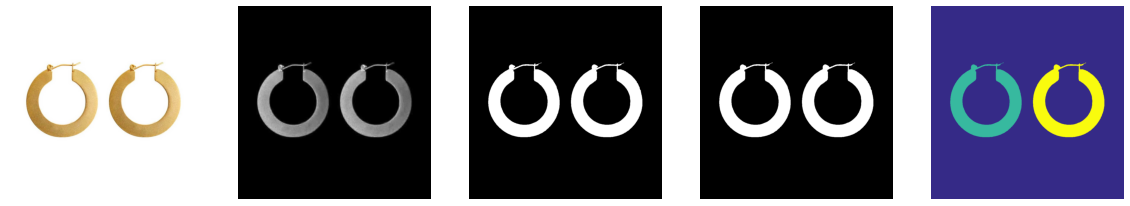

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv     

im = cv.imread("earrings.jpg",cv.IMREAD_COLOR)
assert im is not None

hsv = cv.cvtColor(im,cv.COLOR_BGR2HSV)
th,bw = cv.threshold(hsv[:,:,1],0,255,cv.THRESH_BINARY + cv.THRESH_OTSU)

w = 5
kernal = np.ones((w,w),np.uint8)
opened = cv.morphologyEx(bw,cv.MORPH_CLOSE,kernal)

retval,labels,stats,centroids = cv.connectedComponentsWithStats(opened)
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype("uint8"),cv.COLORMAP_PARULA)

Z = 720
f = 8
for i,s in enumerate(stats):
    if i!=0:
        print("Items",i,", area in pixels =",s[4])
        print("Items",i,", area in mm\u00b2 =",s[4]*(2.2e-3)**2*(Z*Z)/(f*f))

figure, axis = plt.subplots(1,5, figsize = (20,20))
axis[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
axis[0].axis('off')
axis[1].imshow(cv.cvtColor(hsv[:,:,1], cv.COLOR_BGR2RGB))
axis[1].axis('off')
axis[2].imshow(cv.cvtColor(bw, cv.COLOR_BGR2RGB))
axis[2].axis('off')
axis[3].imshow(cv.cvtColor(opened, cv.COLOR_BGR2RGB))
axis[3].axis('off')
axis[4].imshow(cv.cvtColor(colormapped, cv.COLOR_BGR2RGB))
axis[4].axis('off')
plt.show()

### Question 4

(34, 76, 546, 504)


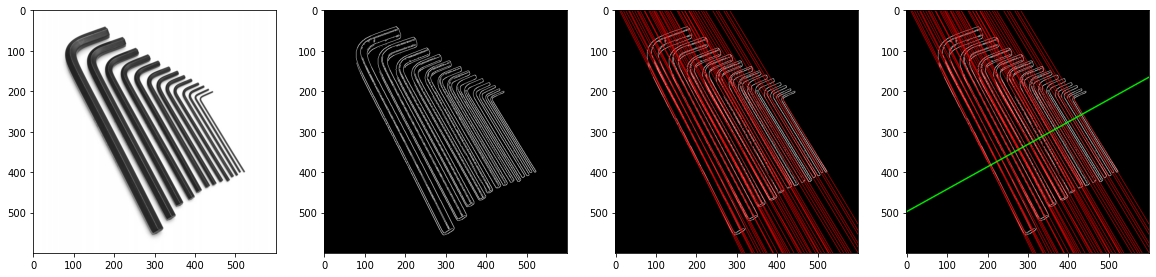

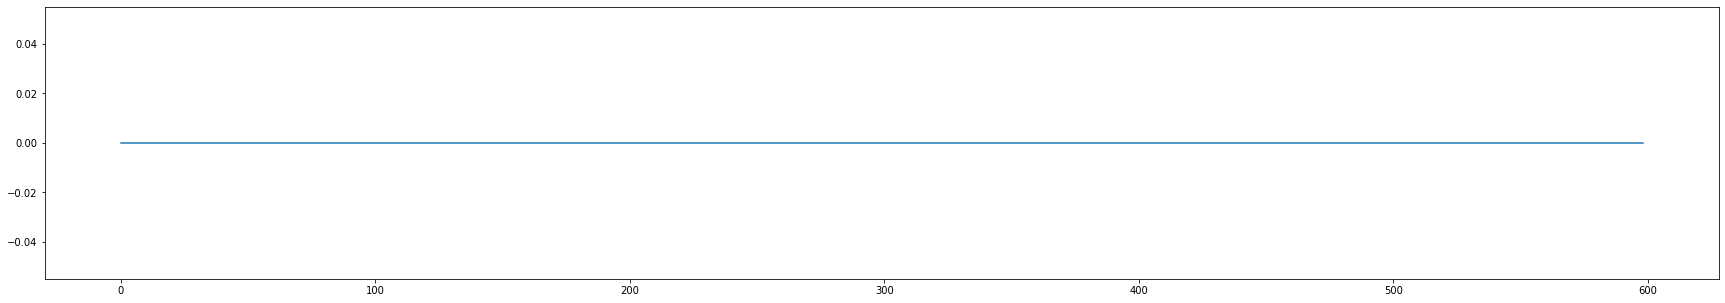

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im=cv.imread("allenkeys.jpg",cv.IMREAD_REDUCED_GRAYSCALE_2)
canny=cv.Canny(im,50,150)

canny_color=cv.cvtColor(canny,cv.COLOR_GRAY2BGR)

lines=cv.HoughLines(canny,1,np.pi/180,170,None,0,0)

if lines is not None:
    for i in range(0,len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        pt1 = (int(x0+1000*(-b)),int(y0+1000*(a)))
        pt2 = (int(x0-1000*(-b)),int(y0-1000*(a)))
        cv.line(canny_color,pt1,pt2,(0,0,255),1,cv.LINE_AA)


fig,axis = plt.subplots(1,4,figsize=(20,20))

cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Image",im)
cv.waitKey(0)
axis[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
cv.imshow("Image",canny)
axis[1].imshow(cv.cvtColor(canny, cv.COLOR_BGR2RGB))
cv.waitKey(0)
cv.imshow("Image",canny_color)
axis[2].imshow(cv.cvtColor(canny_color, cv.COLOR_BGR2RGB))
r = cv.selectROI("Image",canny_color,showCrosshair=False,fromCenter=False)
cv.waitKey(0)
print(r)

x0,y0 = int(r[0]+r[2]/2),int(r[1]+r[3]/2)
m = b/a
m = np.tan(np.median(lines[:,0,1]))
c = y0-m*x0

cv.line(canny_color,(0,int(c)),(im.shape[0],int(m*im.shape[0]+c)),(0,255,0),2,cv.LINE_AA)

cv.imshow("Image",canny_color)
axis[3].imshow(cv.cvtColor(canny_color, cv.COLOR_BGR2RGB))
cv.waitKey(0)
cv.destroyAllWindows()

dy = 1
y_sub_pixel = np.arange(0,im.shape[0]-1,dy)
f_sub_pixel = np.zeros_like(y_sub_pixel)
f_sub_pixel_nn=np.zeros_like(y_sub_pixel)

#for i,y in enumerate (y_sub_pixel):
# Your code here to generate the pixel values along the line
    
# Your code hear to compute the widths . Keep in mind of the angle

fig,ax = plt.subplots(figsize = (30,5))
ax.plot(f_sub_pixel_nn)
plt.show()